In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/MVSA-Single.zip"

Streaming output truncated to the last 5000 lines.
 extracting: MVSA_Single/data/3347.txt  
  inflating: MVSA_Single/data/3348.jpg  
  inflating: MVSA_Single/data/3348.txt  
  inflating: MVSA_Single/data/3349.jpg  
 extracting: MVSA_Single/data/3349.txt  
  inflating: MVSA_Single/data/335.jpg  
  inflating: MVSA_Single/data/335.txt  
  inflating: MVSA_Single/data/3350.jpg  
 extracting: MVSA_Single/data/3350.txt  
  inflating: MVSA_Single/data/3351.jpg  
  inflating: MVSA_Single/data/3351.txt  
  inflating: MVSA_Single/data/3352.jpg  
  inflating: MVSA_Single/data/3352.txt  
  inflating: MVSA_Single/data/3353.jpg  
 extracting: MVSA_Single/data/3353.txt  
  inflating: MVSA_Single/data/3354.jpg  
  inflating: MVSA_Single/data/3354.txt  
  inflating: MVSA_Single/data/3355.jpg  
 extracting: MVSA_Single/data/3355.txt  
  inflating: MVSA_Single/data/3356.jpg  
  inflating: MVSA_Single/data/3356.txt  
  inflating: MVSA_Single/data/3357.jpg  
  inflating: MVSA_Single/data/3357.txt  
  inflat

In [ ]:
import glob
imageloc = glob.glob("/content/MVSA_Single/data/*.jpg")

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 12.0 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 55.1 MB/s 
     |████████████████████████████████| 6.6 MB 41.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import requests

from transformers import (

    VisionTextDualEncoderModel,

    VisionTextDualEncoderProcessor,

    ViTFeatureExtractor,

    BertTokenizer,

)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

processor = VisionTextDualEncoderProcessor(feature_extractor, tokenizer)

model = VisionTextDualEncoderModel.from_vision_text_pretrained("google/vit-base-patch16-224", "bert-base-uncased")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The projection layer and logit scale weights `['visual_projection.weight', 'text_projection.weight', 'logit_scale']` are newly initialized. You should prob

In [ ]:
import cv2
import nltk
import numpy as np
from tqdm import tqdm
import codecs
# save and load from pretrained

model.save_pretrained("vit-bert")
textfeatures=[]
imagefeatures=[]
model = VisionTextDualEncoderModel.from_pretrained("vit-bert")
d={}
d2={}
j=0
for img in tqdm(imageloc):
  image = cv2.imread(img)
  image = cv2.resize(image,(200,200))
  #preprocessing the image
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  d[str(j)]=img
  
  imgc = img[:-4]
  textl = imgc +".txt"
  #print(textl)
  with codecs.open(textl, 'r', encoding='utf-8',errors='ignore') as text:
    k=text.read()
  #preprocessing the text
  
  d2[img]=k
  j=j+1
  #print(image.shape)
  inputs = processor(text=k, images=image, return_tensors="pt", padding=True)
  # inference
  outputs = model(**inputs)
  t = outputs.text_embeds[0].detach().numpy()
  i = outputs.image_embeds[0].detach().numpy()
  textfeatures.append(t)
  imagefeatures.append(i)
  



100%|██████████| 4869/4869 [1:09:55<00:00,  1.16it/s]


In [ ]:
features=[]
for i in range(4869):
  temp=np.concatenate((textfeatures[i],imagefeatures[i]))
  features.append(temp)

In [ ]:
import pickle
with open('/content/d1.pkl', 'wb') as f:
    pickle.dump(d, f)

In [ ]:
with open('/content/d2.pkl', 'wb') as f:
    pickle.dump(d2, f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/ambicafeatures(1).pkl', 'rb') as f:
    features=pickle.load(f)

In [ ]:
import pandas as pd
df=pd.DataFrame(features)

In [ ]:
import numpy as np
features=np.asarray(features)
features[0]

array([ 0.0699932 ,  0.01831117,  0.04798316, ..., -0.02519989,
        0.01055939, -0.03247126], dtype=float32)

In [ ]:
features.shape

(4869, 1024)

In [ ]:
!pip install metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 841 kB 13.6 MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17816 sha256=9bf2a3993769b4a534c02fd8b9e0c43d403786b03df44be0a4b159faa9d67167
  Stored in directory: /root/.cache/pip/wheels/54/98/67/aa136e6754d2105b31e0f43c72a208c94d812c9e1d9f18d971
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24234 sha256=eb288208a7e613c05fc5394d132ca393a7848fc3dd6fd19f2e94bf207466f80a
  Stored in directory: /root/.cache/pip/wheels/09/97/ce/98234adaab0cf5b2c3a1b6610ada24e6f7ab3675fff4e0b8b2
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [ ]:
import os
import keras
import metrics
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time

from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling


#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

In [ ]:
# this is our input placeholder
input_img = Input(shape=(1024,))
# "encoded" is the encoded representation of the input
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(100, activation='sigmoid')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(1024)(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 500)               512500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_3 (Dense)             (None, 100)               200100    
                                                                 
 dense_4 (Dense)             (None, 2000)              202000    
                                                                 
 dense_5 (Dense)             (None, 500)               100050

In [ ]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
train_x=features

In [ ]:
train_history = autoencoder.fit(train_x, train_x, epochs=50, batch_size=64)

Epoch 1/50
77/77 [==============================] - 7s 8ms/step - loss: 0.0011
Epoch 2/50
77/77 [==============================] - 0s 6ms/step - loss: 9.5302e-04
Epoch 3/50
77/77 [==============================] - 1s 8ms/step - loss: 9.5241e-04
Epoch 4/50
77/77 [==============================] - 0s 6ms/step - loss: 9.4844e-04
Epoch 5/50
77/77 [==============================] - 0s 6ms/step - loss: 9.2099e-04
Epoch 6/50
77/77 [==============================] - 0s 6ms/step - loss: 9.0059e-04
Epoch 7/50
77/77 [==============================] - 0s 6ms/step - loss: 8.7764e-04
Epoch 8/50
77/77 [==============================] - 0s 5ms/step - loss: 8.4888e-04
Epoch 9/50
77/77 [==============================] - 0s 6ms/step - loss: 8.1662e-04
Epoch 10/50
77/77 [==============================] - 1s 7ms/step - loss: 7.9873e-04
Epoch 11/50
77/77 [==============================] - 1s 8ms/step - loss: 7.8213e-04
Epoch 12/50
77/77 [==============================] - 1s 7ms/step - loss: 7.6804e-04
Epoch

In [ ]:
pred_auto_train = encoder.predict(train_x)

In [ ]:
len(pred_auto_train[0])

100

In [ ]:
pred_auto_train.shape

(4869, 100)

In [ ]:
df={}
for index,value in enumerate(pred_auto_train):
    print(1)
    df[index] = value


In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

In [ ]:
df.T.iloc[0][:]

0     0.306583
1     0.313164
2     0.166743
3     0.228818
4     0.141921
        ...   
59    0.379749
60    0.509218
61    0.153741
62    0.208784
63    0.330445
Name: 0, Length: 64, dtype: float32

In [ ]:
from tqdm import tqdm
df=df.T
simmat=np.zeros((4869,4869))
from sklearn.metrics.pairwise import cosine_similarity
for i in tqdm(range(4869)):
  for j in range(i+1):
    simmat[i][j] = cosine_similarity([np.asarray(df.iloc[i][:])],[np.asarray(df.iloc[j][:])])
    simmat[j][i] = cosine_similarity([np.asarray(df.iloc[i][:])],[np.asarray(df.iloc[j][:])])
    

 15%|█▌        | 741/4869 [05:17<58:40,  1.17it/s]

In [ ]:
simmat.shape

(11, 11)

In [ ]:
s=0
for i in range(4869):
  for j in range(4869):
    s=s+simmat[i][j]
mu = s/100

In [ ]:
A=np.zeros((4869,4869))
for i in range(4869):
  for j in range(4869):
    if(simmat[i][j]>=mu):
      A[i][j]=1
    else:
      A[i][j]=0

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
simmat = pairwise_distances(pred_auto_train, metric="cosine")
simmat.shape

(4869, 4869)

In [ ]:
mean=np.mean(simmat)
mean

0.18689129

In [ ]:
check = simmat>mean

In [ ]:
check

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [False,  True, False, ...,  True, False, False],
       ...,
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
temp

array([0.04123183, 0.01427364, 0.01330179, ..., 0.06874187, 0.03263551,
       0.00102619], dtype=float32)

In [ ]:
temp = pd.DataFrame(check)
temp.replace(False, 0, inplace=True)
temp.replace(True, 1, inplace=True)
A=np.asarray(temp)
A

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [ ]:
def compute_laplacian(W):
    '''
    Reference for simple: https://en.wikipedia.org/wiki/Laplacian_matrix
        simple:
            L = D - W
    '''
    # calculate row sums
    d = W.sum(axis=1)

    #create degree matrix
    D = np.diag(d)
    L =  D - W
    return L

In [ ]:
L = compute_laplacian(A)


In [ ]:
def get_eigvecs(L, k):
    '''
    Calculate Eigenvalues and EigenVectors of the Laplacian Matrix.
    Return k eigenvectors corresponding to the smallest k eigenvalues.
    Uses real part of the complex numbers in eigenvalues and vectors.
    The Eigenvalues and Vectors will be complex numbers when using
    NearestNeighbor adjacency matrix for W.
    '''

    eigvals, eigvecs = np.linalg.eig(L)
    # sort eigenvalues and select k smallest values - get their indices
    ix_sorted_eig = np.argsort(eigvals)[:k]

    #select k eigenvectors corresponding to k-smallest eigenvalues
    return eigvecs[:,ix_sorted_eig]

In [ ]:
E = get_eigvecs(L, 100)

In [ ]:
!pip install k_means_constrained

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 561 kB 11.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 724 kB/s 
     |████████████████████████████████| 38.1 MB 207 kB/s 
     |████████████████████████████████| 407 kB 7.8 MB/s 
  Created wheel for k-means-constrained: filename=k_means_constrained-0.7.0-cp37-cp37m-linux_x86_64.whl size=1420693 sha256=969fc6592265fefc3c3537a354bd04d9c89f9d449683ad0219fd318c7b8d696c
  Stored in directory: /root/.cache/pip/wheels/97/2e/70/c473dfd41bc709dd3c2a89ae09d345a5ffb77d1906a2a77176
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: scipy
    Found existi

In [ ]:
from k_means_constrained import KMeansConstrained
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
K=range(99,100)
for k in tqdm(K):
    
    clusterer = KMeansConstrained(
     n_clusters=k,
     size_min=10,
     size_max=60,
     random_state=0
)
    clusterer.fit(E)
    cluster_labels = clusterer.predict(E)
    silhouette_avg = silhouette_score(E, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

100%|██████████| 1/1 [31:23<00:00, 1883.99s/it]

For n_clusters = 99 The average silhouette_score is : -0.2047338297869854


In [ ]:
pred=cluster_labels

In [ ]:
nc=99

In [ ]:
dic={}
cr=nc
for j in range(cr):
  k=[]
  for i in range(len(pred)):
    if(pred[i]==j):
      k.append(d[str(i)])
  dic[str(j)]=k

In [ ]:
dic

{'0': ['/content/MVSA_Single/data/3183.jpg',
  '/content/MVSA_Single/data/771.jpg',
  '/content/MVSA_Single/data/1886.jpg',
  '/content/MVSA_Single/data/1473.jpg',
  '/content/MVSA_Single/data/2982.jpg',
  '/content/MVSA_Single/data/382.jpg',
  '/content/MVSA_Single/data/3961.jpg',
  '/content/MVSA_Single/data/4244.jpg',
  '/content/MVSA_Single/data/1500.jpg',
  '/content/MVSA_Single/data/1274.jpg',
  '/content/MVSA_Single/data/4073.jpg',
  '/content/MVSA_Single/data/2161.jpg',
  '/content/MVSA_Single/data/4166.jpg',
  '/content/MVSA_Single/data/3667.jpg',
  '/content/MVSA_Single/data/4082.jpg',
  '/content/MVSA_Single/data/4448.jpg',
  '/content/MVSA_Single/data/4350.jpg',
  '/content/MVSA_Single/data/3503.jpg',
  '/content/MVSA_Single/data/1076.jpg',
  '/content/MVSA_Single/data/134.jpg',
  '/content/MVSA_Single/data/4747.jpg',
  '/content/MVSA_Single/data/3775.jpg',
  '/content/MVSA_Single/data/4902.jpg',
  '/content/MVSA_Single/data/3062.jpg',
  '/content/MVSA_Single/data/3415.jpg'

In [ ]:
#recommendation system for input text
text="My name is Bond, James Bond."
image = np.zeros((200,200,3), np.uint8)
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
t = outputs.text_embeds[0].detach().numpy()
i = outputs.image_embeds[0].detach().numpy()

In [ ]:
#similarity implementation
from sklearn.metrics.pairwise import cosine_similarity
import math
distance=[]
for i in range(len(textfeatures)):
  t=np.asarray(t)
  textfeatures[i]=np.asarray(textfeatures[i])
  
  dis=cosine_similarity([t],[textfeatures[i]])
  distance.append(dis)

In [ ]:
max=0
maxindex=0
for i in range(len(distance)):
  if(distance[i]>max):
    max=distance[i]
    maxindex=i

In [ ]:
maxindex

94

In [ ]:
dic

{'0': ['/content/MVSA_Single/data/3183.jpg',
  '/content/MVSA_Single/data/771.jpg',
  '/content/MVSA_Single/data/1886.jpg',
  '/content/MVSA_Single/data/1473.jpg',
  '/content/MVSA_Single/data/2982.jpg',
  '/content/MVSA_Single/data/382.jpg',
  '/content/MVSA_Single/data/3961.jpg',
  '/content/MVSA_Single/data/4244.jpg',
  '/content/MVSA_Single/data/1500.jpg',
  '/content/MVSA_Single/data/1274.jpg',
  '/content/MVSA_Single/data/4073.jpg',
  '/content/MVSA_Single/data/2161.jpg',
  '/content/MVSA_Single/data/4166.jpg',
  '/content/MVSA_Single/data/3667.jpg',
  '/content/MVSA_Single/data/4082.jpg',
  '/content/MVSA_Single/data/4448.jpg',
  '/content/MVSA_Single/data/4350.jpg',
  '/content/MVSA_Single/data/3503.jpg',
  '/content/MVSA_Single/data/1076.jpg',
  '/content/MVSA_Single/data/134.jpg',
  '/content/MVSA_Single/data/4747.jpg',
  '/content/MVSA_Single/data/3775.jpg',
  '/content/MVSA_Single/data/4902.jpg',
  '/content/MVSA_Single/data/3062.jpg',
  '/content/MVSA_Single/data/3415.jpg'

In [ ]:
d

{'0': '/content/MVSA_Single/data/3951.jpg',
 '1': '/content/MVSA_Single/data/3137.jpg',
 '2': '/content/MVSA_Single/data/2594.jpg',
 '3': '/content/MVSA_Single/data/5070.jpg',
 '4': '/content/MVSA_Single/data/3371.jpg',
 '5': '/content/MVSA_Single/data/14.jpg',
 '6': '/content/MVSA_Single/data/4643.jpg',
 '7': '/content/MVSA_Single/data/4347.jpg',
 '8': '/content/MVSA_Single/data/4252.jpg',
 '9': '/content/MVSA_Single/data/4052.jpg',
 '10': '/content/MVSA_Single/data/4160.jpg',
 '11': '/content/MVSA_Single/data/1814.jpg',
 '12': '/content/MVSA_Single/data/4462.jpg',
 '13': '/content/MVSA_Single/data/3195.jpg',
 '14': '/content/MVSA_Single/data/3641.jpg',
 '15': '/content/MVSA_Single/data/1980.jpg',
 '16': '/content/MVSA_Single/data/766.jpg',
 '17': '/content/MVSA_Single/data/4996.jpg',
 '18': '/content/MVSA_Single/data/1638.jpg',
 '19': '/content/MVSA_Single/data/529.jpg',
 '20': '/content/MVSA_Single/data/4723.jpg',
 '21': '/content/MVSA_Single/data/3672.jpg',
 '22': '/content/MVSA_Si

In [ ]:
for i in range(cr):
  for a in dic[str(i)]:
    if(a==d[str(maxindex)]):
      clus=i

In [ ]:
clus

14

the recommended images are(couldnt show images since cv2.imshow doesnt work on colab) ['/content/MVSA_Single/data/1333.jpg', '/content/MVSA_Single/data/2651.jpg', '/content/MVSA_Single/data/4042.jpg', '/content/MVSA_Single/data/4102.jpg', '/content/MVSA_Single/data/1513.jpg', '/content/MVSA_Single/data/2159.jpg', '/content/MVSA_Single/data/4958.jpg', '/content/MVSA_Single/data/2869.jpg', '/content/MVSA_Single/data/3007.jpg', '/content/MVSA_Single/data/3410.jpg', '/content/MVSA_Single/data/4533.jpg', '/content/MVSA_Single/data/841.jpg', '/content/MVSA_Single/data/2433.jpg', '/content/MVSA_Single/data/3523.jpg', '/content/MVSA_Single/data/2947.jpg', '/content/MVSA_Single/data/1049.jpg', '/content/MVSA_Single/data/1635.jpg', '/content/MVSA_Single/data/2850.jpg', '/content/MVSA_Single/data/3897.jpg', '/content/MVSA_Single/data/3190.jpg', '/content/MVSA_Single/data/4937.jpg', '/content/MVSA_Single/data/350.jpg', '/content/MVSA_Single/data/4348.jpg', '/content/MVSA_Single/data/4951.jpg', '/c

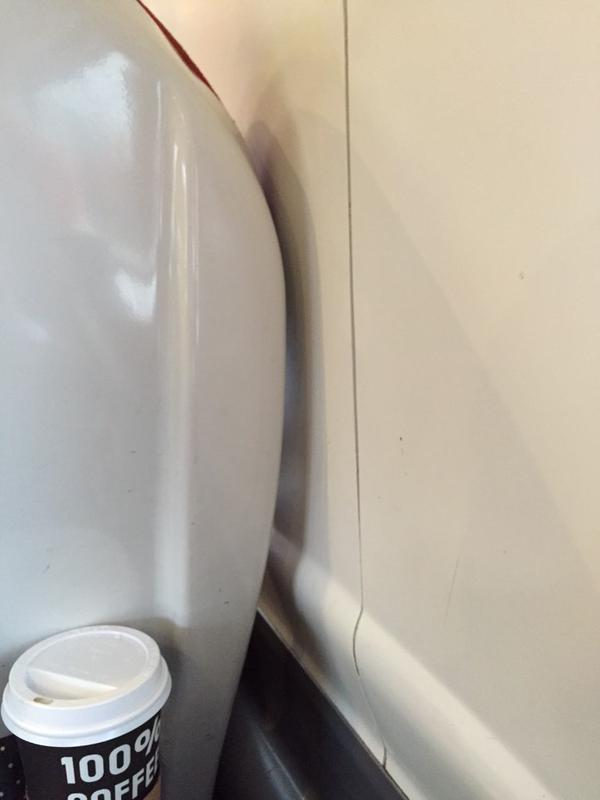

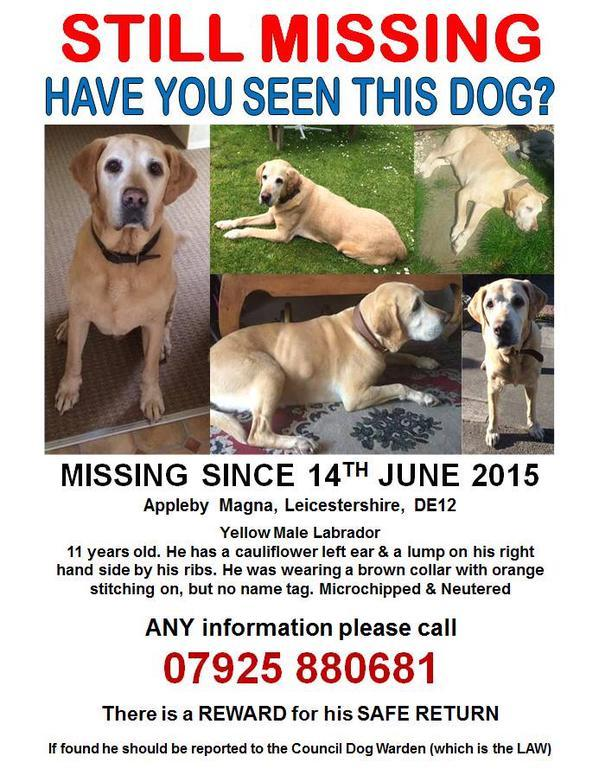

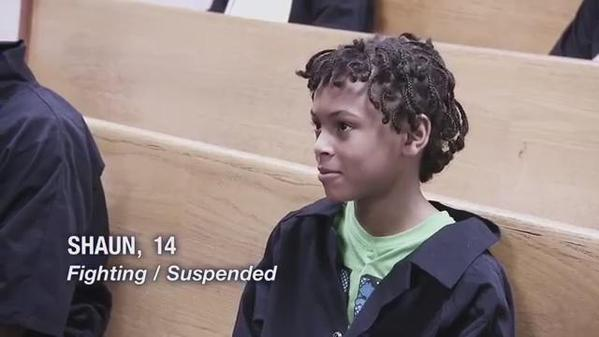

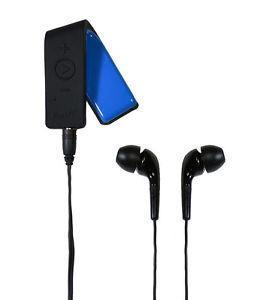

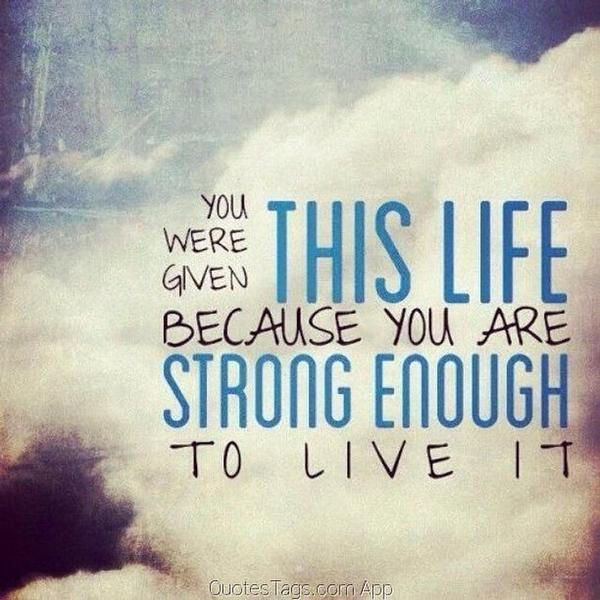

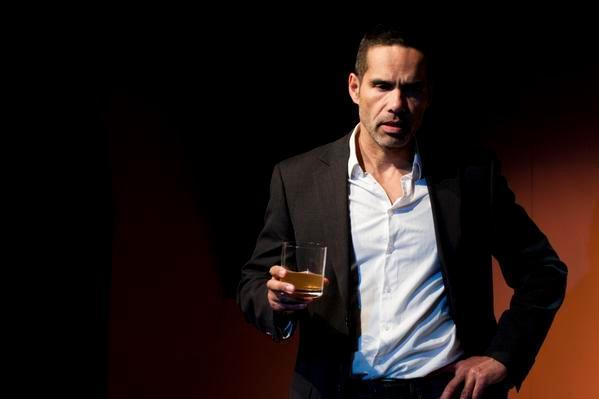

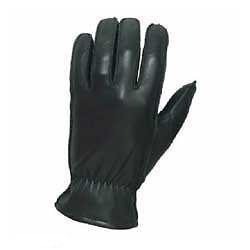

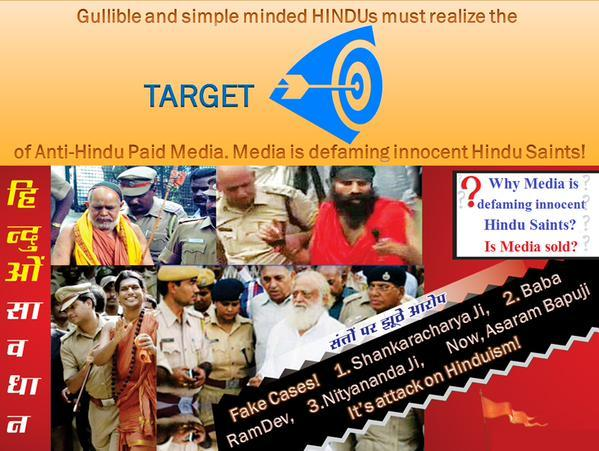

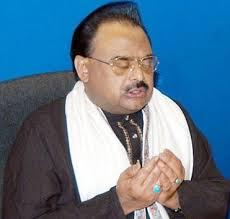

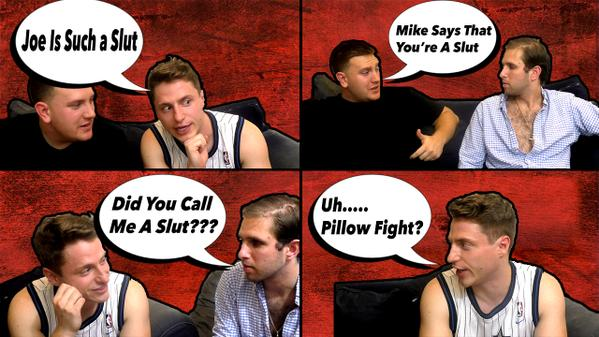

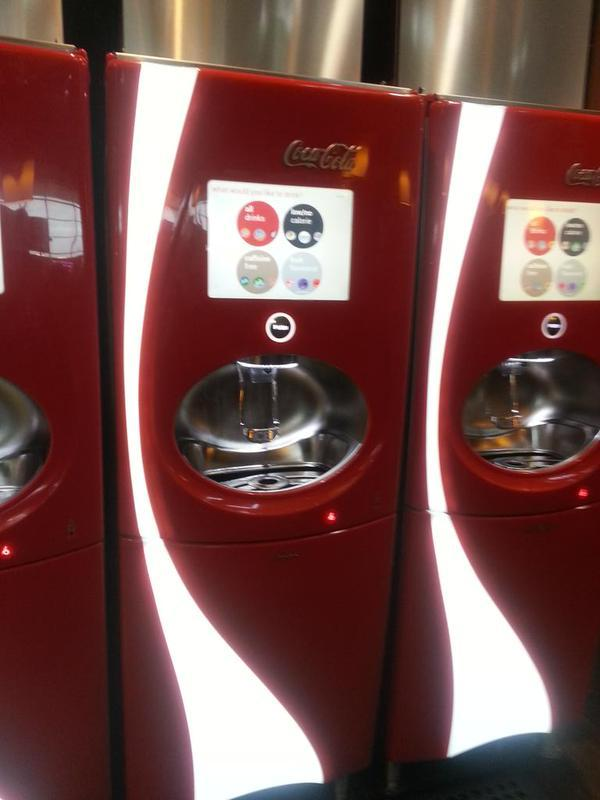

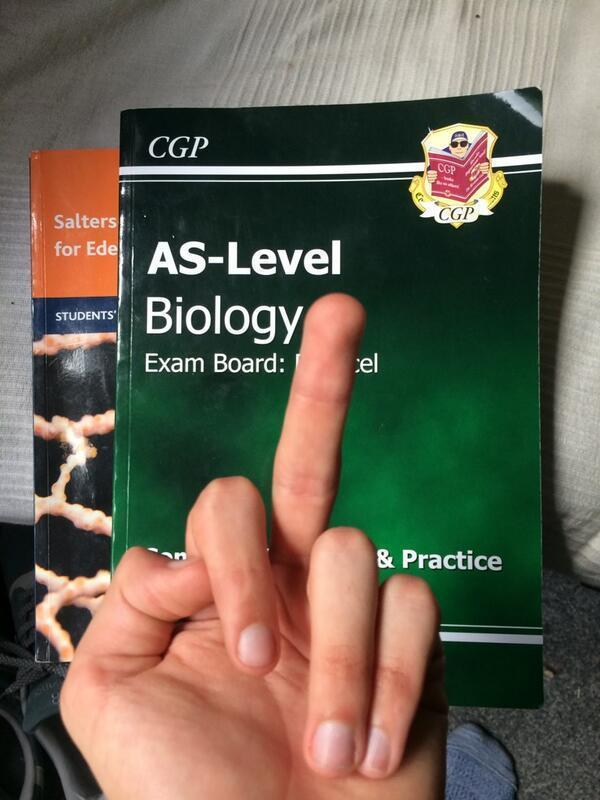

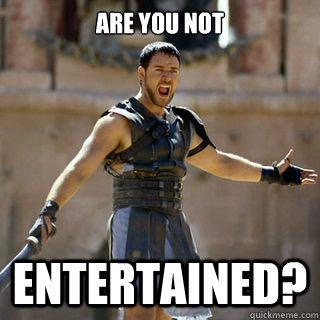

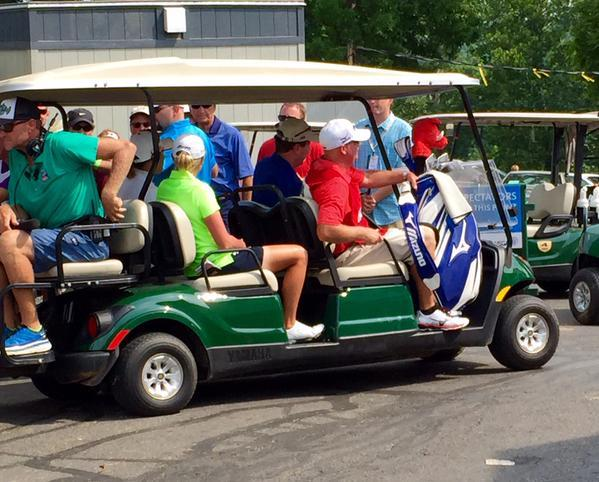

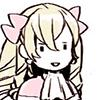

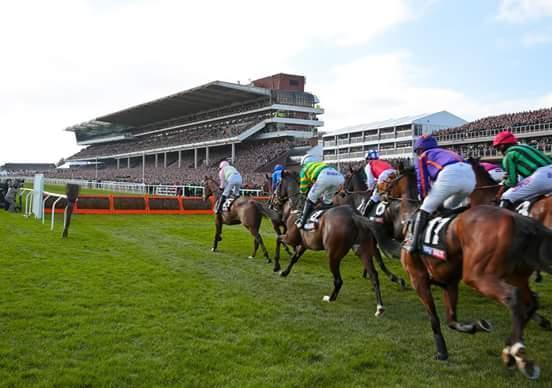

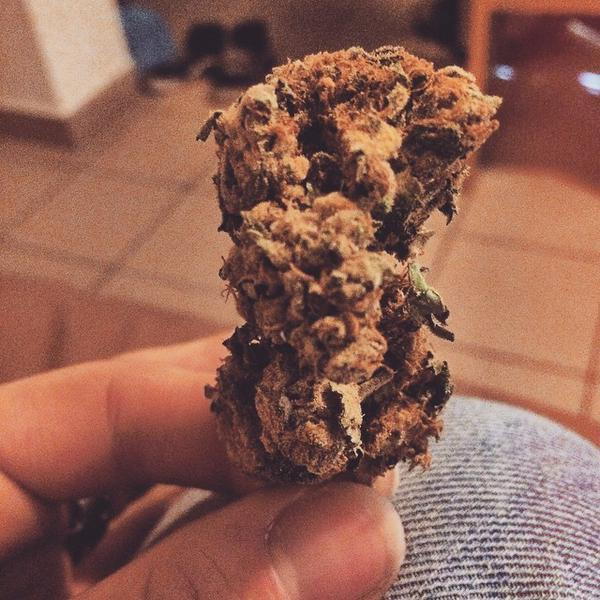

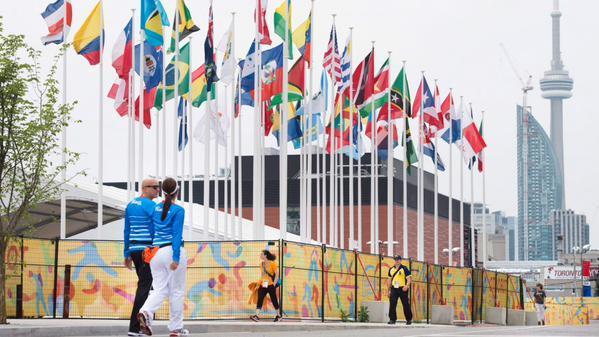

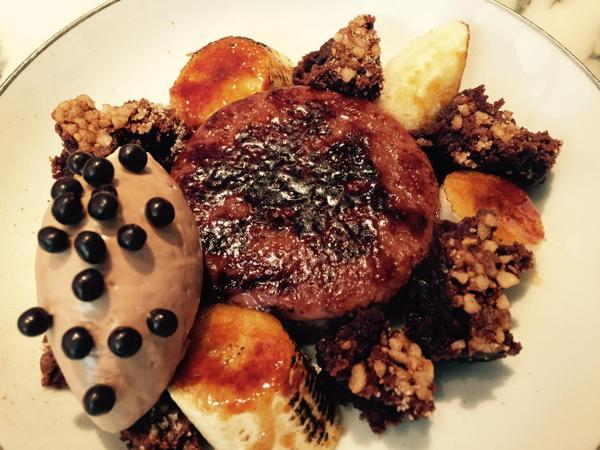

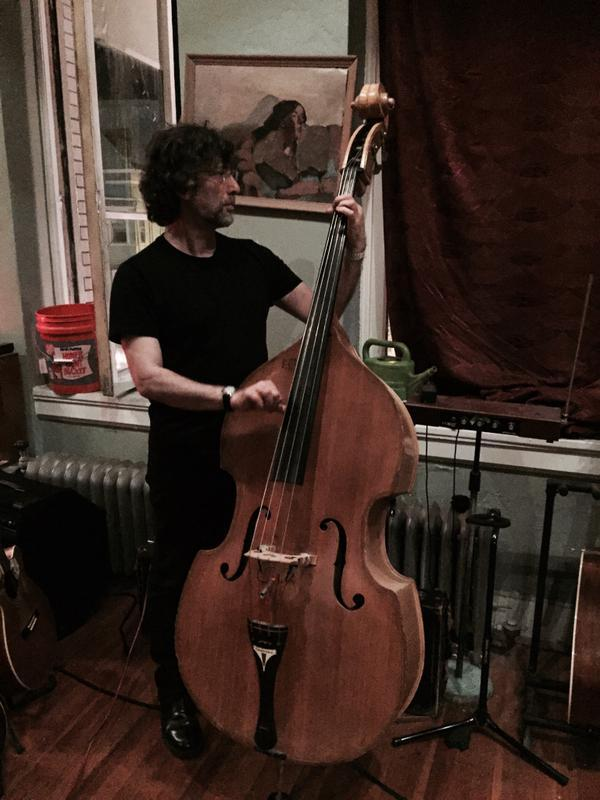

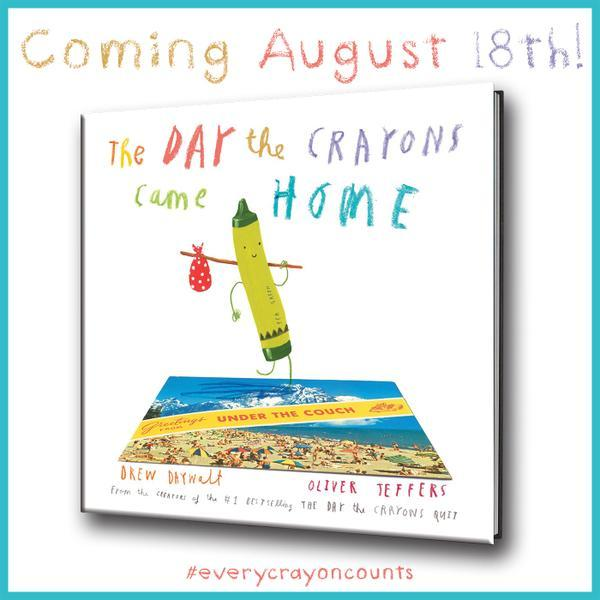

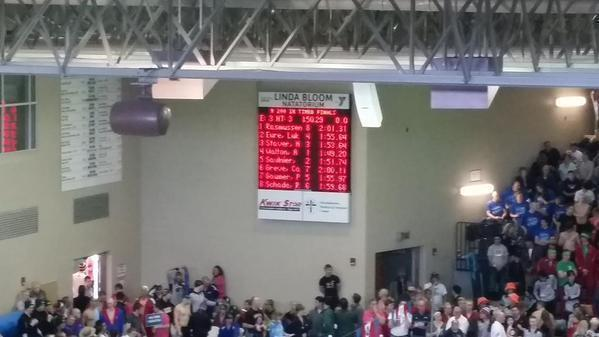

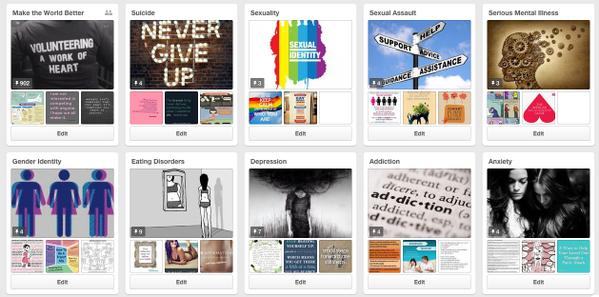

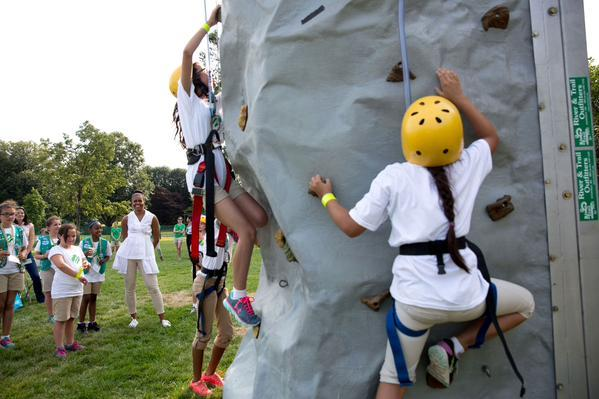

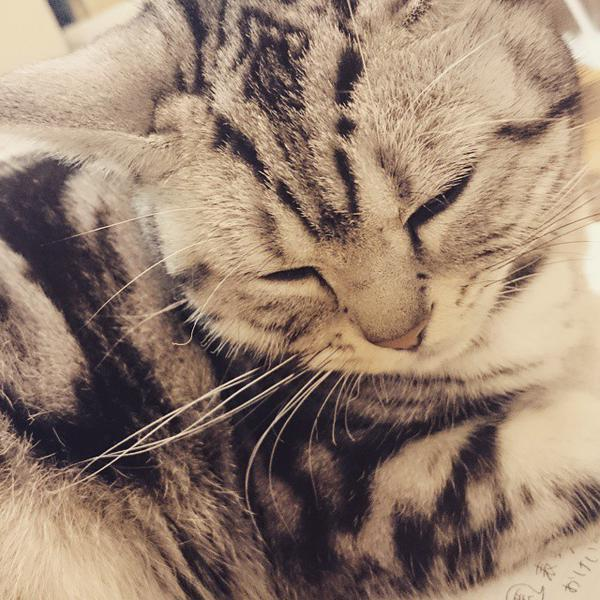

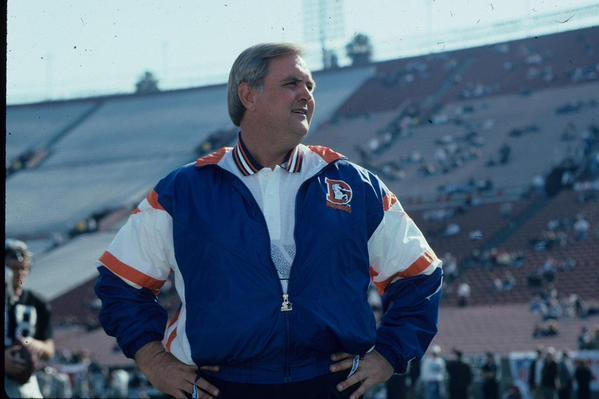

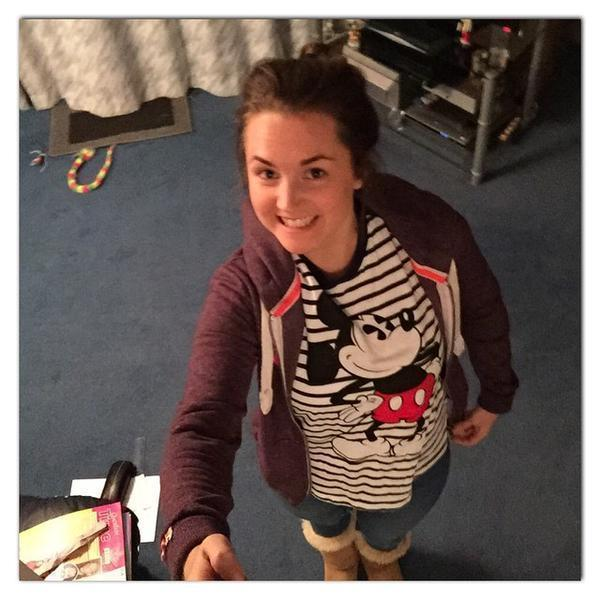

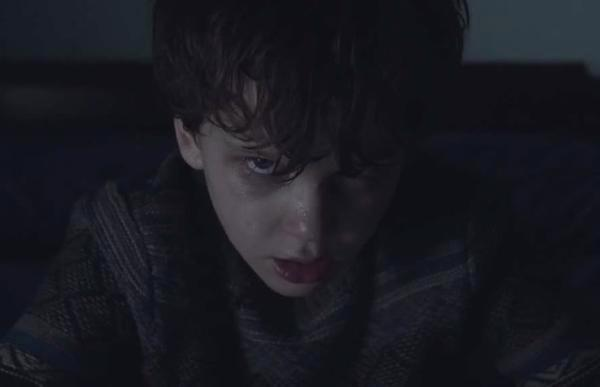

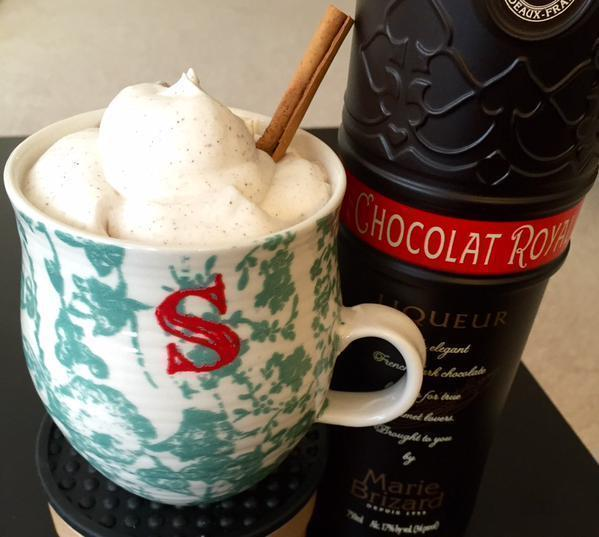

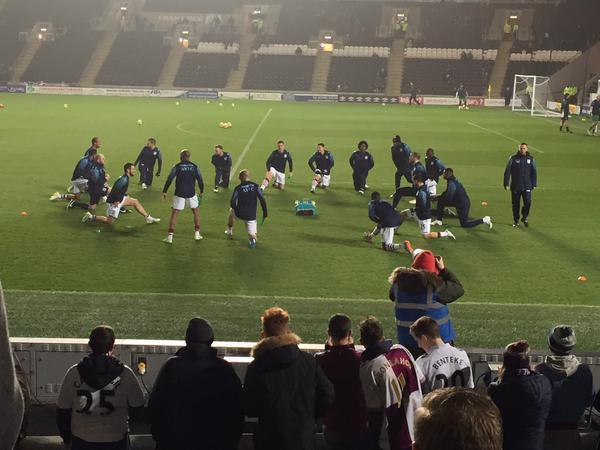

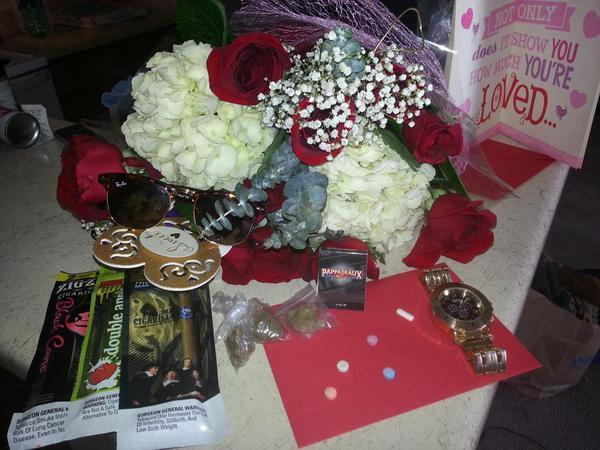

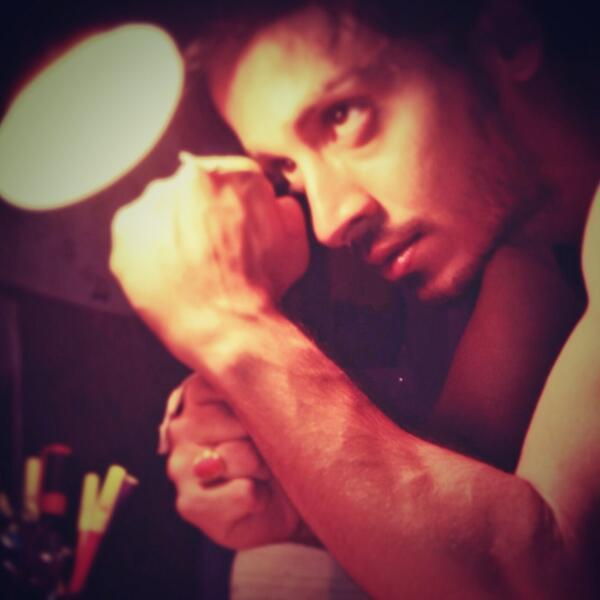

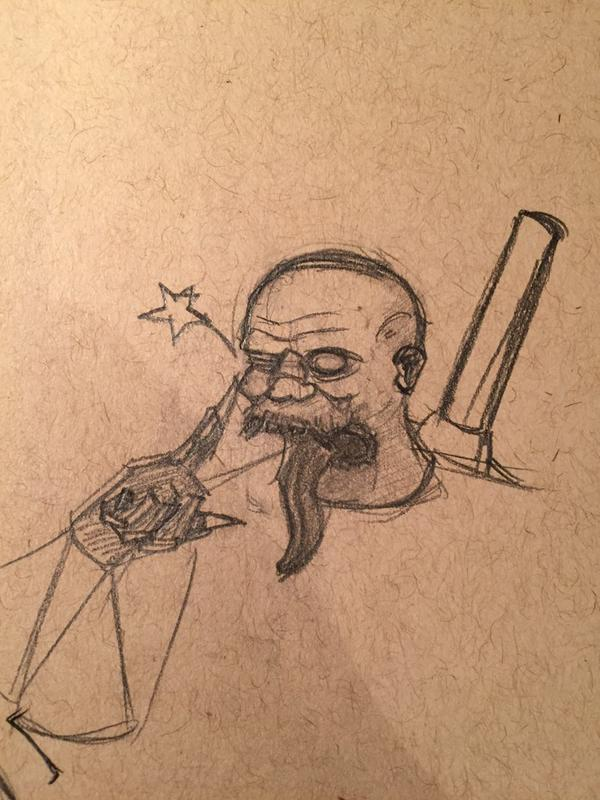

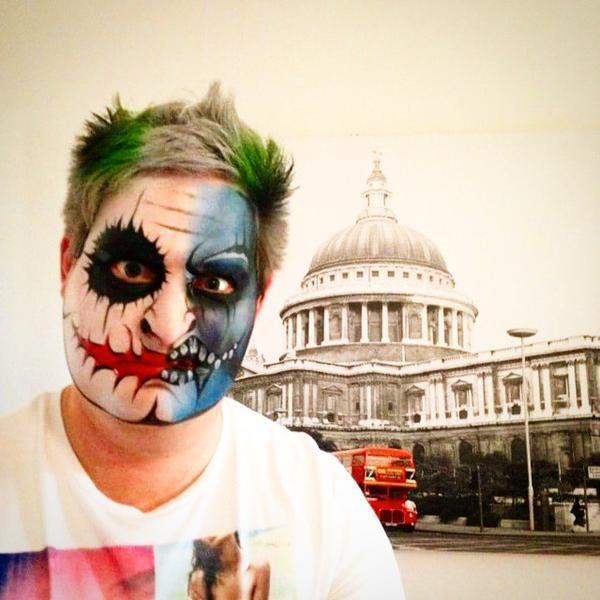

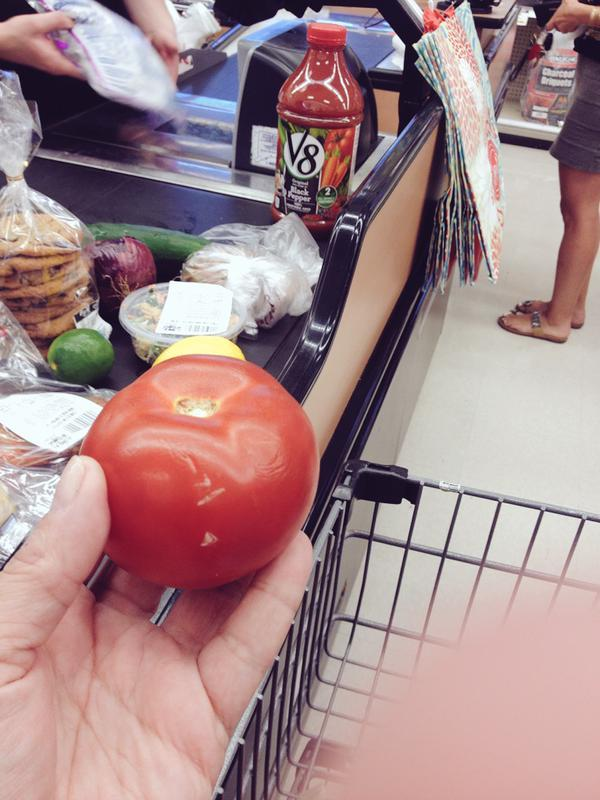

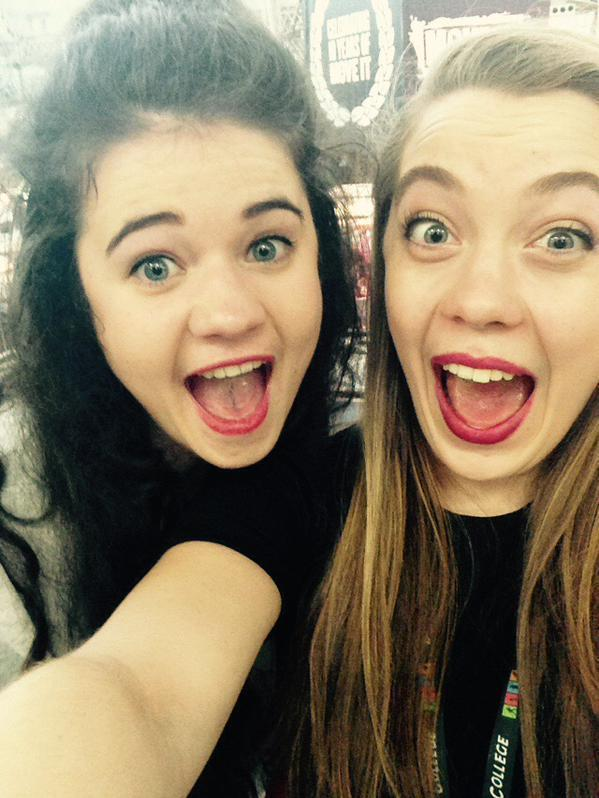

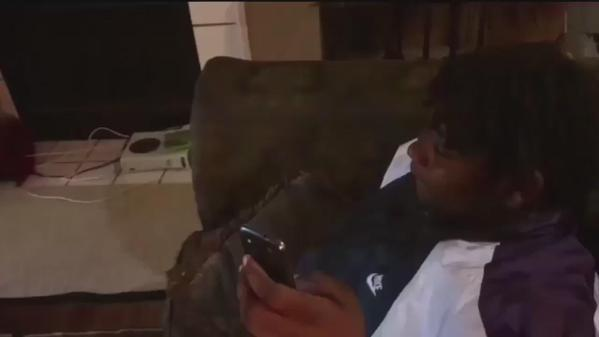

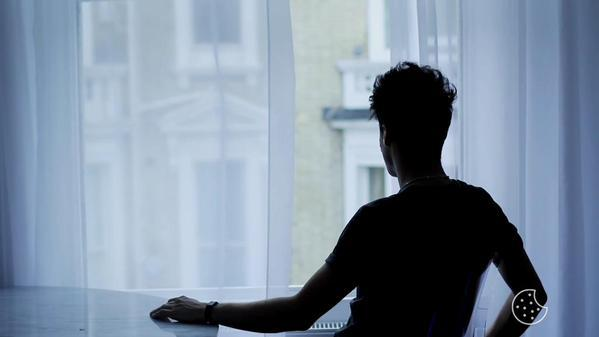

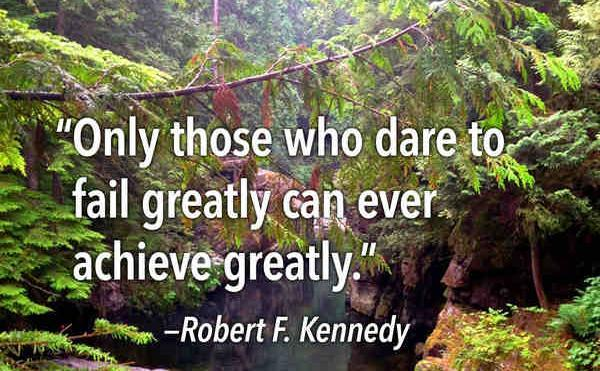

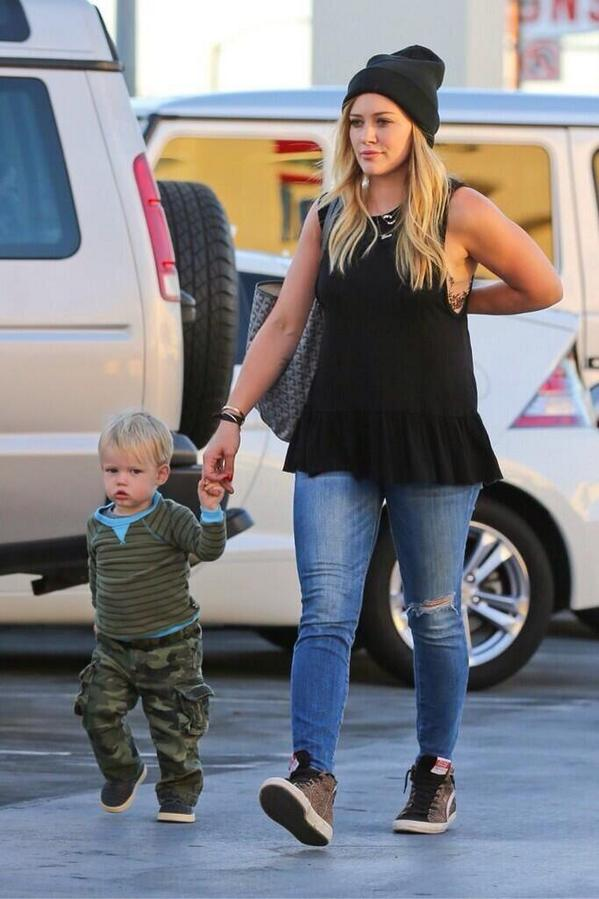

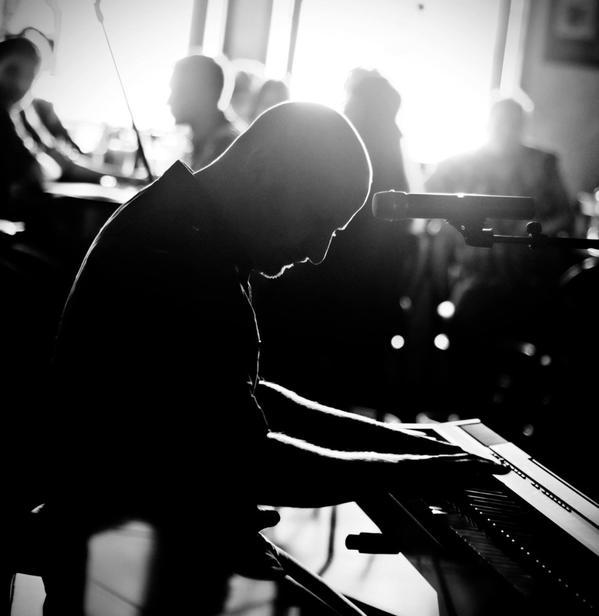

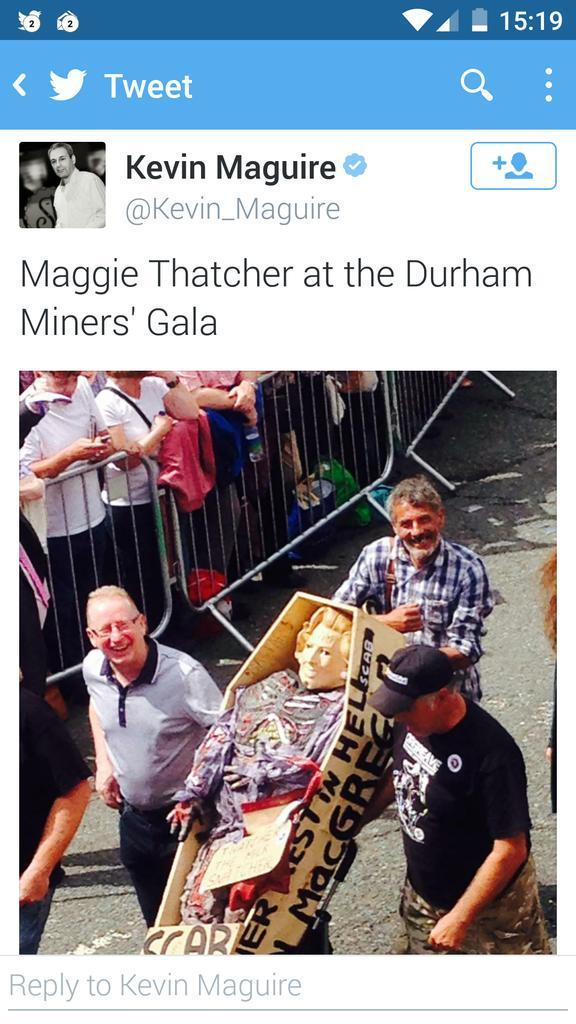

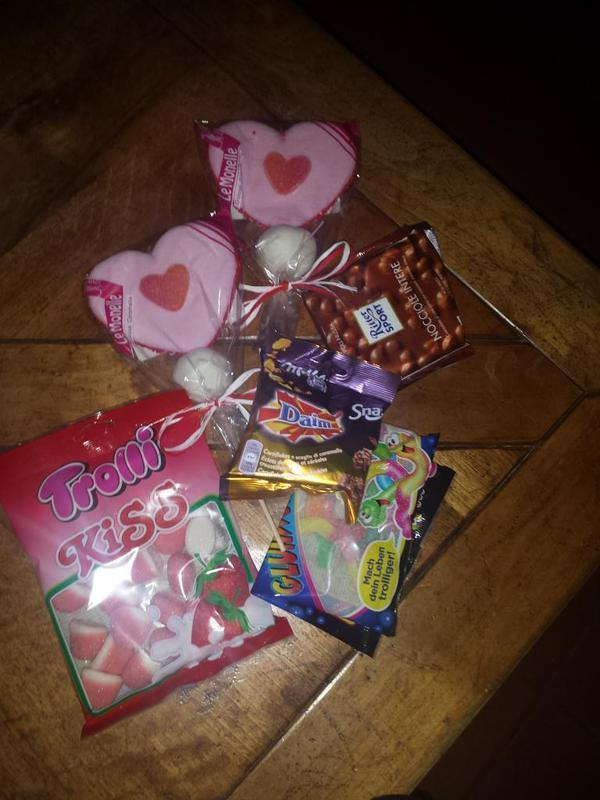

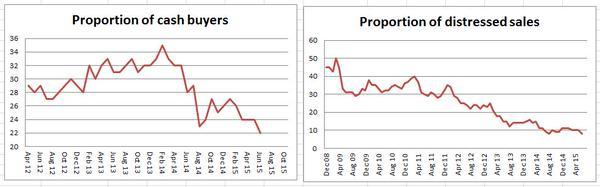

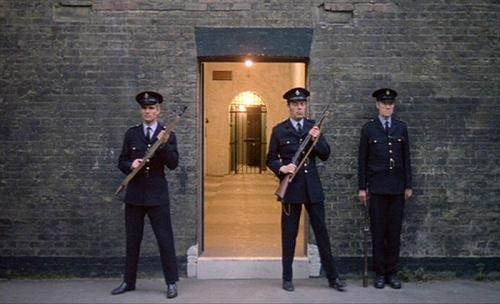

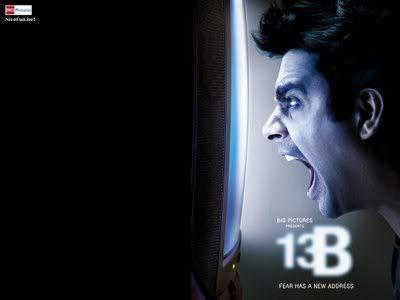

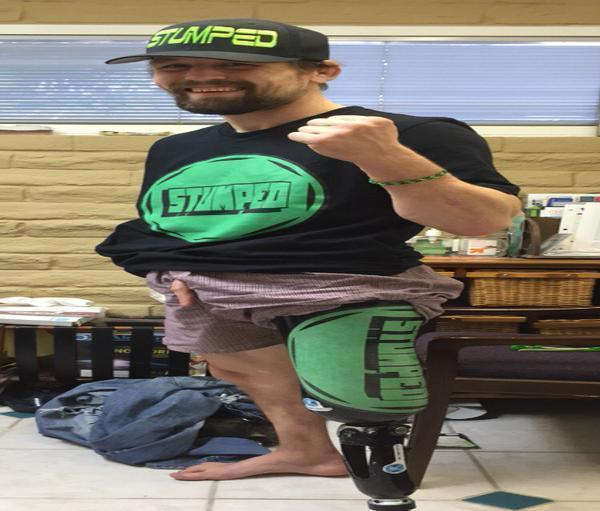

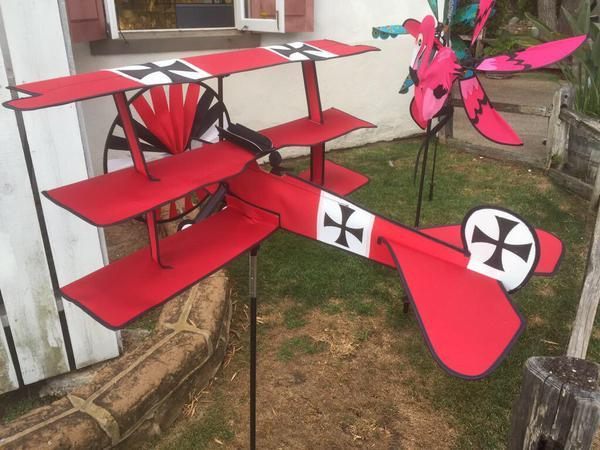

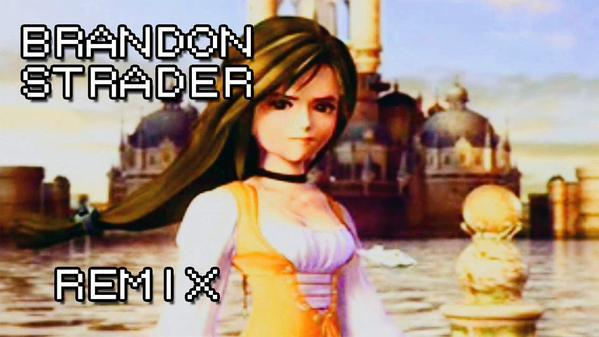

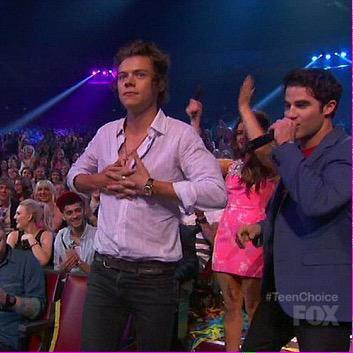

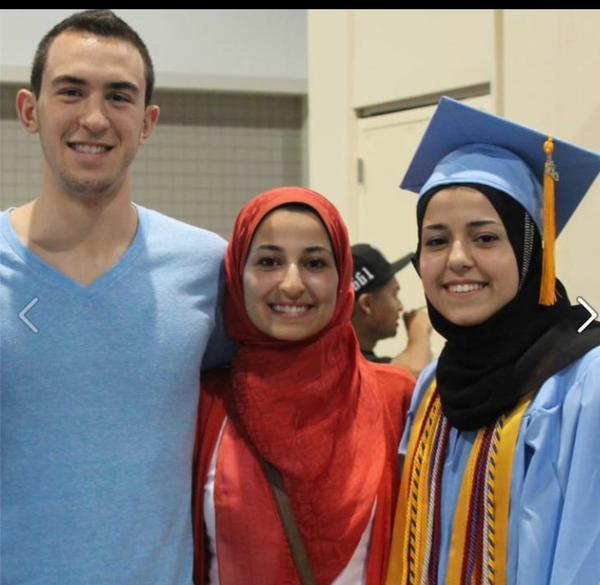

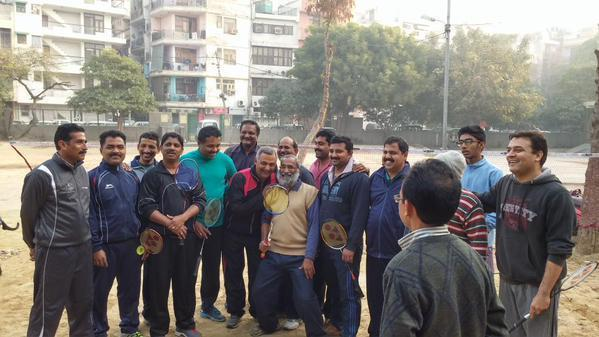

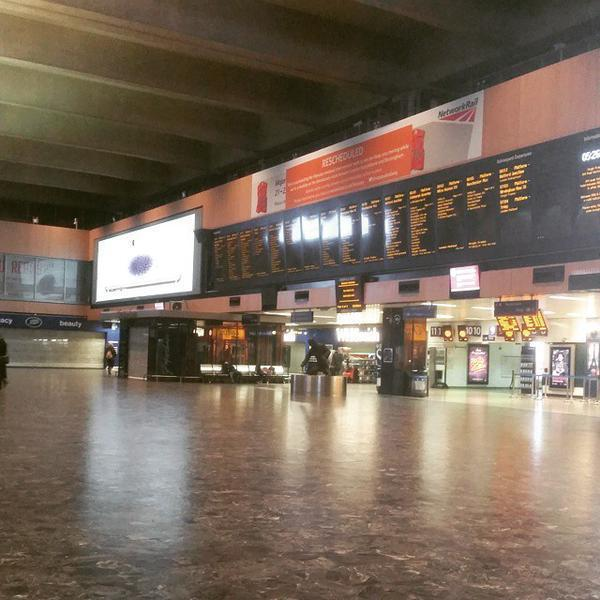

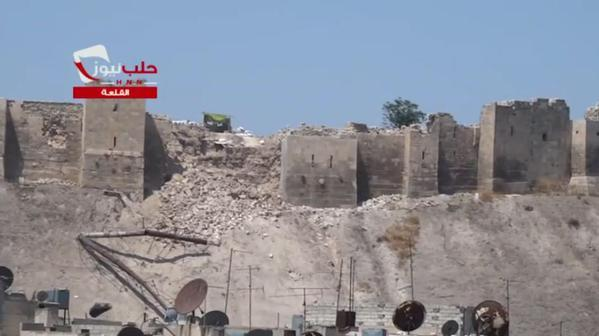

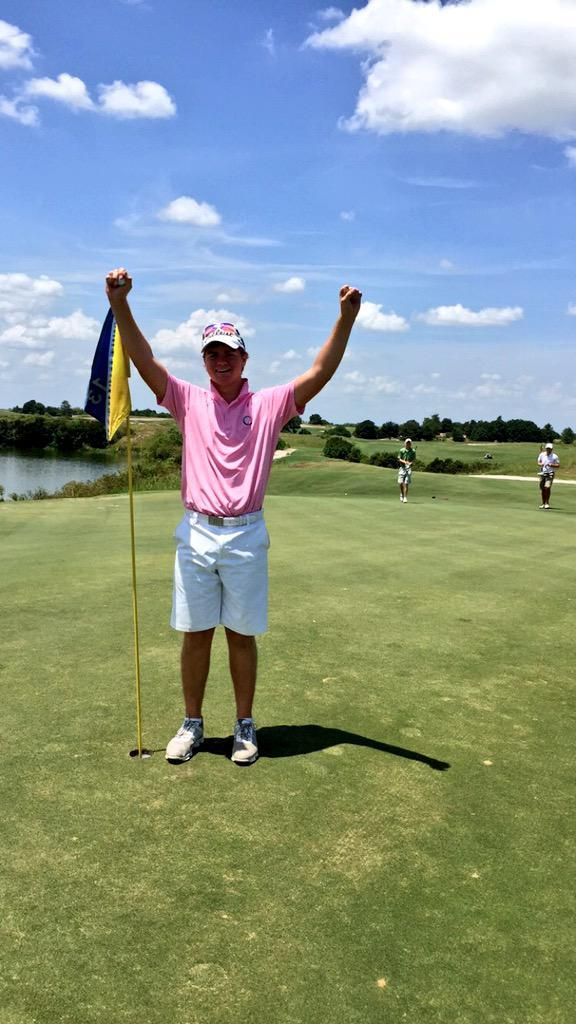

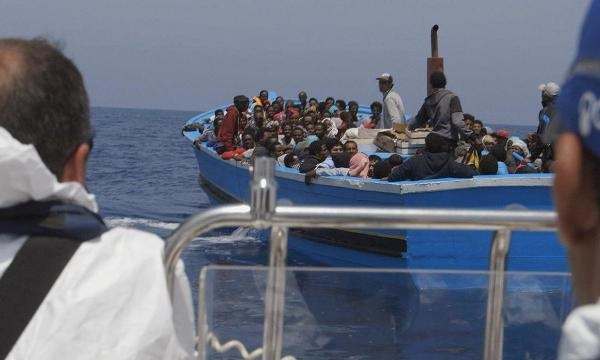

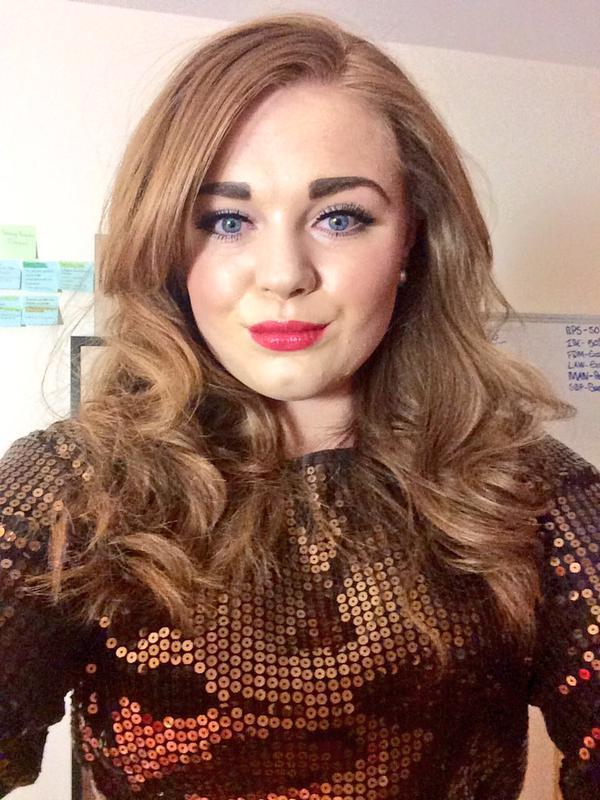

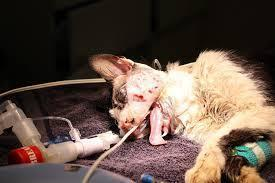

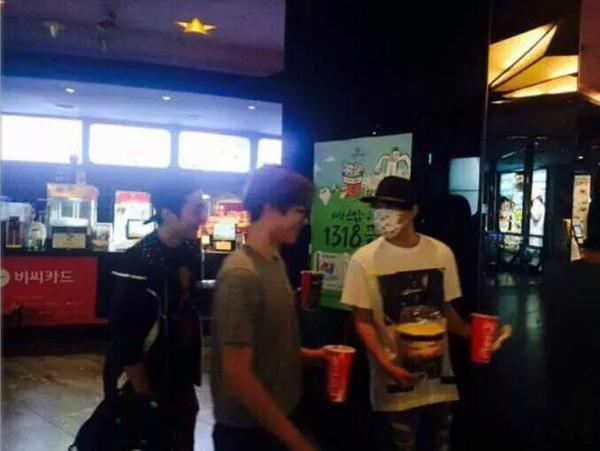

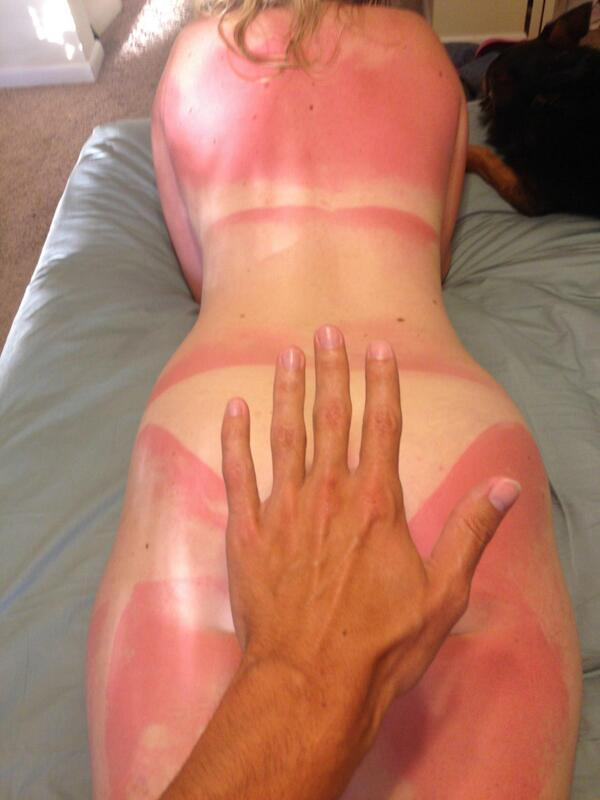

In [ ]:
from IPython.display import Image
print("the recommended images are(couldnt show images since cv2.imshow doesnt work on colab)",dic[str(clus)])
for image in dic[str(clus)]:
  display(Image(image))

In [ ]:
d2

{'/content/MVSA_Single/data/3951.jpg': 'RT @Retro_Spectro_: When being transracial goes wrong ????? \r\n',
 '/content/MVSA_Single/data/3137.jpg': 'RT @jbwhitesnake: This woman,and her party,are a disgrace ,utter capitulation ,servitude ,inept ,corrupt support of the torys.SACK HER http \r\n',
 '/content/MVSA_Single/data/2594.jpg': 'Ali Alameer just defeated tmsngrd in Champions League @QuizUp - \r\n',
 '/content/MVSA_Single/data/5070.jpg': 'RT @WSJGraphics: Gawker reeling amid identity crisis http://t.co/M4J9YvV0GK http://t.co/nm8V2gNQOn\r\n',
 '/content/MVSA_Single/data/3371.jpg': 'How a #bitcoin atm promotes mixed martial arts in a #lasvegas gym #crypto #cryptocurrency \r\n',
 '/content/MVSA_Single/data/14.jpg': 'RT @ChesterPerforms: An energetic @sbutlerbooks tells us all about his sister - "the most evil bumface in the world\'!! #WayWord #Chester ht \r\n',
 '/content/MVSA_Single/data/4643.jpg': 'All is Divine so shine dont whine and u will find u are meant to be here there is nothi

In [ ]:
print("the recommended texts are")
for x in dic[str(clus)]:
  print(d2[x])

the recommended texts are
@thetrainline This is my table window seat that I ordered online. 4th time in a row you've got it wrong. #Fuming 

?Buster is still missing..Appleby Magna,Leics.....owners are desperate..please retweet..thank you? 

RT @BeyondScaredVid: Yep I would've dropped out of the program right then and there. This dude is something else ?? http://t.co/oPJxfchi1R

Cell Phone USA : BlueAnt Ribbon Stereo Bluetooth Streamer Bluetooth Headset Black/Blue #44 http://t.co/zjMxpiy5qZ http://t.co/SxsErQydyL

RT @Ramikantari: #hurt #pain #angry #quotestags #quote #nofilter @quotestags_app 

Todays premiere is sold out! Pulitzer Prize winner #Disgraced by Ayad Akhtar! 

Castle - standard motorcycle gloves - Womens Medium - Black / 20-2024 http://t.co/xWqbD0KCZz http://t.co/draetUDptD

RT @AvanteeA: False Allegations by media exposed by Shiva: Asaram Bapu Ji never meets any girl alone. #Media420 

RT @OfficialMqm: Altaf grieved over demise of Saudi Prince Saud Al faisal https://t.co

In [ ]:
#recommendation system for input image
text=""
image = cv2.imread("/content/10001.jpg")
image = cv2.resize(image,(200,200))
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
t = outputs.text_embeds[0].detach().numpy()
i = outputs.image_embeds[0].detach().numpy()

In [ ]:
#similarity implementation
import math
distance=[]
for j in range(len(imagefeatures)):
  i=np.asarray(i)
  imagefeatures[j]=np.asarray(imagefeatures[j])
  
  dis=weightc*np.linalg.norm(t-imagefeatures[j])+(1-weightc)*get_manhattan_distance(t,imagefeatures[j])
  distance.append(1/(1+dis))

In [ ]:
max=0
maxindex=0
for i in range(len(distance)):
  if(distance[i]>max):
    max=distance[i]
    maxindex=i

In [ ]:
for i in range(3):
  for a in dic[str(i)]:
    if(a==d[str(maxindex)]):
      clus=i

In [ ]:
dic

{'0': ['/content/drive/MyDrive/dataambica/10003.jpg',
  '/content/drive/MyDrive/dataambica/10004.jpg',
  '/content/drive/MyDrive/dataambica/10001.jpg',
  '/content/drive/MyDrive/dataambica/10005.jpg',
  '/content/drive/MyDrive/dataambica/10010.jpg',
  '/content/drive/MyDrive/dataambica/10009.jpg',
  '/content/drive/MyDrive/dataambica/10006.jpg',
  '/content/drive/MyDrive/dataambica/10008.jpg'],
 '1': ['/content/drive/MyDrive/dataambica/10000.jpg'],
 '2': ['/content/drive/MyDrive/dataambica/10002.jpg']}

the recommended images are(couldnt show images since cv2.imshow doesnt work on colab) ['/content/drive/MyDrive/dataambica/10003.jpg', '/content/drive/MyDrive/dataambica/10004.jpg', '/content/drive/MyDrive/dataambica/10001.jpg', '/content/drive/MyDrive/dataambica/10005.jpg', '/content/drive/MyDrive/dataambica/10010.jpg', '/content/drive/MyDrive/dataambica/10009.jpg', '/content/drive/MyDrive/dataambica/10006.jpg', '/content/drive/MyDrive/dataambica/10008.jpg']


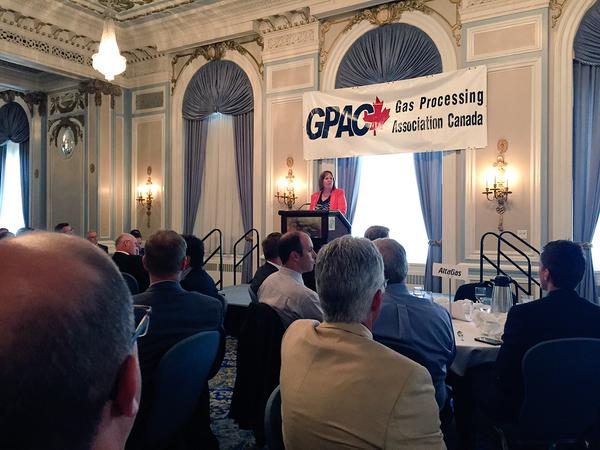

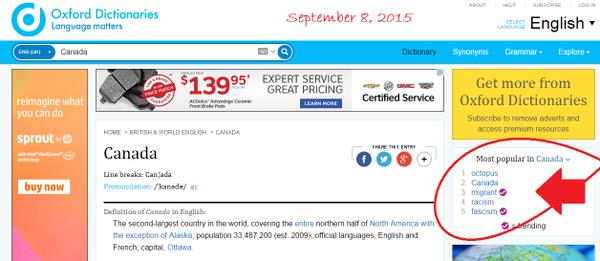

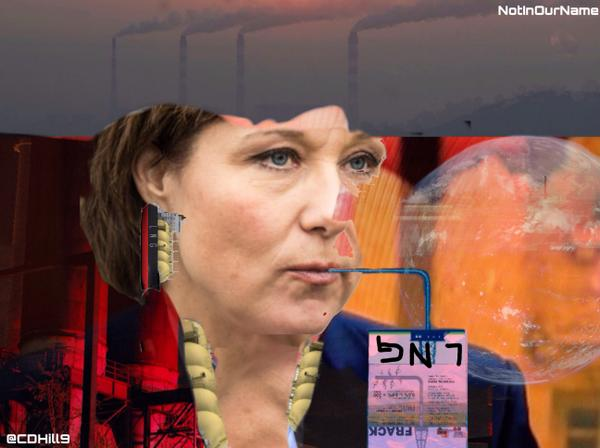

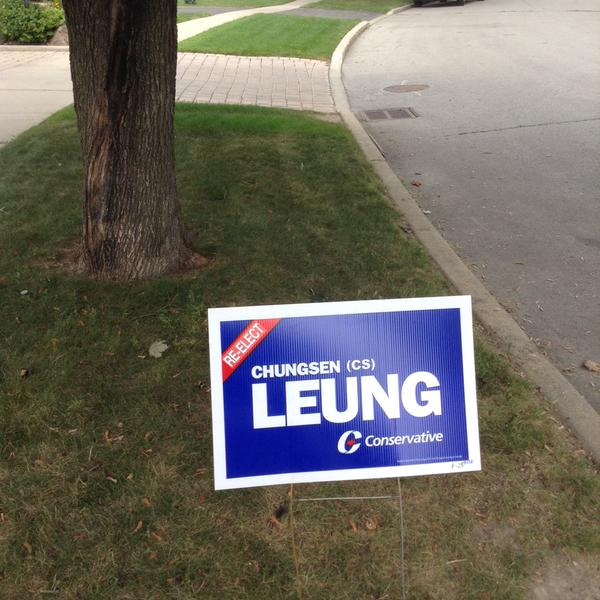

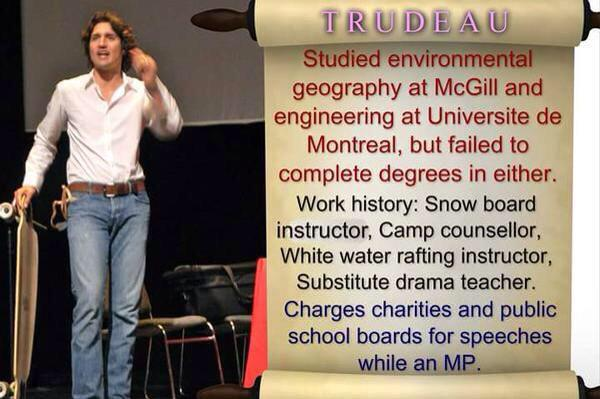

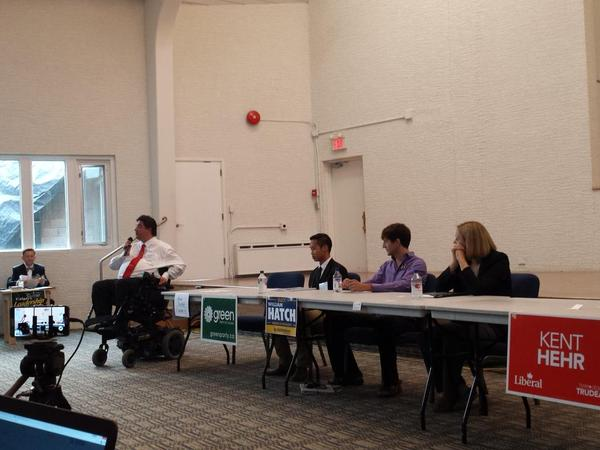

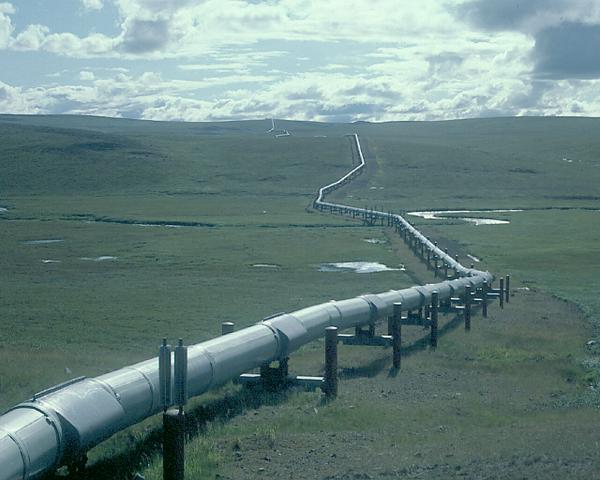

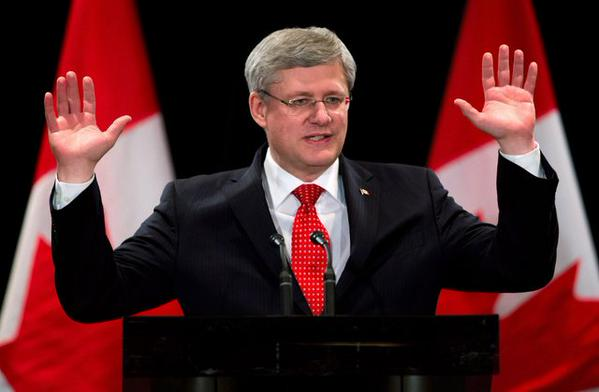

In [ ]:
from IPython.display import Image
print("the recommended images are(couldnt show images since cv2.imshow doesnt work on colab)",dic[str(clus)])
for image in dic[str(clus)]:
  display(Image(image))

In [ ]:
print("the recommended texts are")
for x in dic[str(clus)]:
  print(d2[x])

the recommended texts are
Full house for Energy Minister @MargforMLA's speech to Gas Processing Association Canada's speech. #ableg #cdnpoli
#OxfordDictionary #Canada Top 5 trending searches incl #Fascism #Racism + #Migrant #CdnPoli http://t.co/kLOELlppGm
Thx #BC gov for wasting my tax $ to lie to me about #LNG-no #fracking #cdnpoli #BCpoli #climatechange
@kris_sims got my sign for #elexn42! #cdnpoli
@CBCNews add good at paddling, to resume. #cdnpoli
@kenthehr at #yyccentre debate #cdnpoli
only 5% of #pipeline ""failsafe"" detection ever works #climateaction … …” #cdnpoli #climate https://t.co/O8MRsAgg4L
#Harperman ,can we suspend you for destroying #lennon's Imagine? or sweet child (cringe) of mine!? #cdnpoli
